<a href="https://colab.research.google.com/github/sahankrt20/Tensorflow/blob/main/imageclassifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential,datasets,layers,models


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

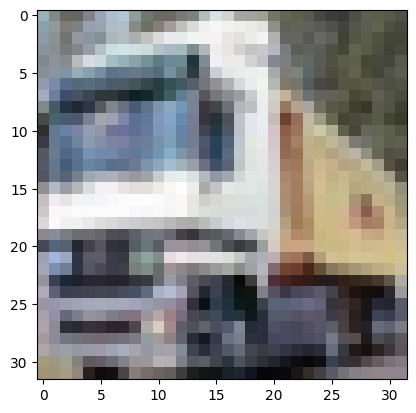

In [9]:
plt.imshow(X_train[1])

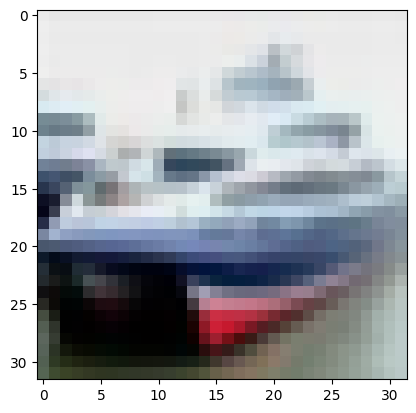

In [10]:
plt.imshow(X_test[1])

In [11]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","truck"]

In [12]:
def plot_sample(X,y,index):
  plt.figure(figsize=(11,8))
  plt.imshow(X[index])
  # Assuming 'classes' is a list like ['class1', 'class2', 'class3']
  plt.xlabel(classes[y[index]])  # Accessing the first class name

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
y_train=y_train.reshape(-1,)

In [16]:
y_train.shape

(50000,)

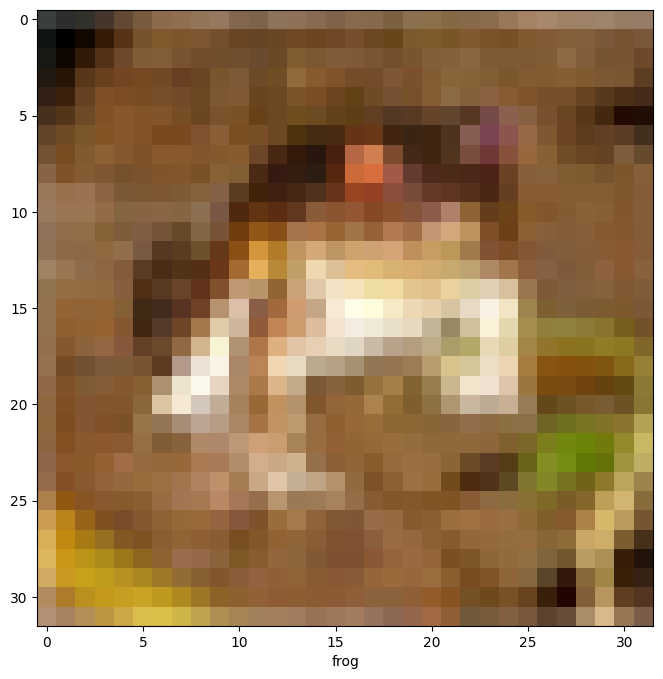

In [17]:
plot_sample(X_train,y_train,0)

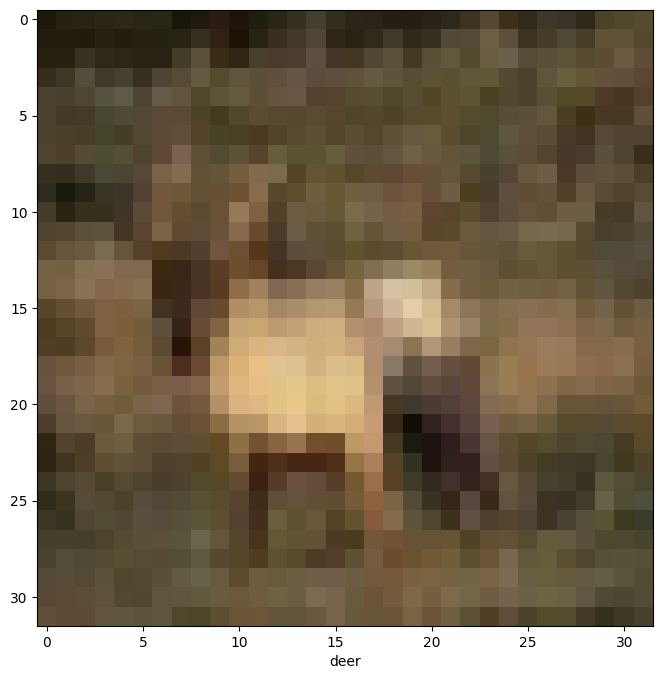

In [18]:
plot_sample(X_train,y_train,3)

In [19]:
X_train=X_train/255
X_test=X_test/255

In [21]:
an=models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
an.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
an.fit(X_train,y_train,epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3030 - loss: 1.9361
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4195 - loss: 1.6445
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4578 - loss: 1.5435
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4765 - loss: 1.4906
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4919 - loss: 1.4319
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5115 - loss: 1.3953
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5236 - loss: 1.3514
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5355 - loss: 1.3180
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5477 - loss: 1.2874
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5630 - loss: 1.2469
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5750 - loss: 1.2137
Epoch 12/100
1563/

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
y_pred=an.predict(X_test)
y_pred_class=[np.argmax(element) for element in y_pred]
print("Classification report:\n",classification_report(y_test,y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65      1000
           1       0.64      0.71      0.68      1000
           2       0.56      0.36      0.44      1000
           3       0.32      0.58      0.41      1000
           4       0.57      0.36      0.44      1000
           5       0.52      0.12      0.19      1000
           6       0.62      0.60      0.61      1000
           7       0.48      0.72      0.57      1000
           8       0.65      0.72      0.68      1000
           9       0.64      0.58      0.61      1000

    accuracy                           0.54     10000
   macro avg       0.56      0.54      0.53     10000
weighted avg       0.56      0.54      0.53     10000



In [27]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')


])

In [31]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6039 - loss: 1.1364
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6357 - loss: 1.0563
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6528 - loss: 1.0021
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6667 - loss: 0.9635
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6823 - loss: 0.9180
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6933 - loss: 0.8756
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7107 - loss: 0.8315
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7191 - loss: 0.8113
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7291 - loss: 0.7770
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7429 - loss: 0.7459


In [32]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6243 - loss: 1.0908


[1.1046642065048218, 0.6255999803543091]

In [33]:
y_test=y_test.reshape(-1,)

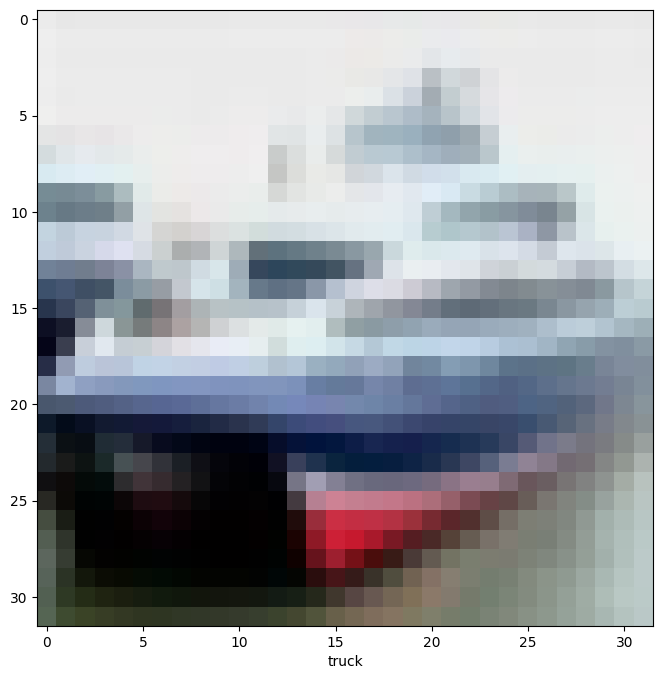

In [36]:
plot_sample(X_test,y_test,1)

In [37]:
y_preds=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [38]:
y_preds[:5]

array([[3.9857719e-03, 3.1913492e-05, 1.4982306e-02, 6.0884017e-01,
        6.7904191e-03, 8.9222752e-02, 9.7204149e-02, 2.5255117e-03,
        1.7337759e-01, 3.0394217e-03],
       [1.5570969e-02, 3.5773152e-01, 9.7945129e-05, 9.3226081e-06,
        4.4073308e-06, 1.2334029e-05, 3.4442127e-07, 5.7211145e-07,
        6.1819369e-01, 8.3788419e-03],
       [6.8427330e-01, 4.9867593e-02, 6.4331447e-03, 1.8077835e-03,
        7.3346129e-04, 2.6454878e-04, 3.4490273e-05, 2.2973964e-04,
        2.2039911e-01, 3.5956826e-02],
       [6.2573898e-01, 6.5696626e-03, 8.5829690e-02, 3.7489040e-03,
        1.8465955e-02, 1.3017115e-04, 9.4568590e-03, 3.6337595e-05,
        2.4909639e-01, 9.2703610e-04],
       [8.4639299e-07, 1.0127472e-05, 5.1934510e-03, 4.1608211e-02,
        7.0466399e-01, 6.4538601e-03, 2.4196114e-01, 5.7628400e-05,
        7.5179773e-06, 4.3267391e-05]], dtype=float32)

In [39]:
np.argmax([5,12,167,2])

2

In [41]:
y_classes=[np.argmax(element) for element in y_preds]

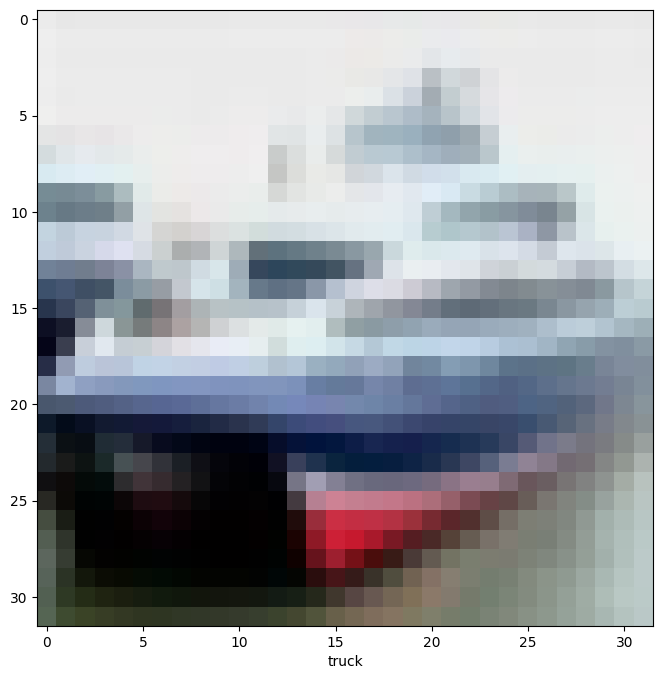

In [43]:
plot_sample(X_test,y_test,1)

In [44]:
classes[y_classes[1]]

'truck'

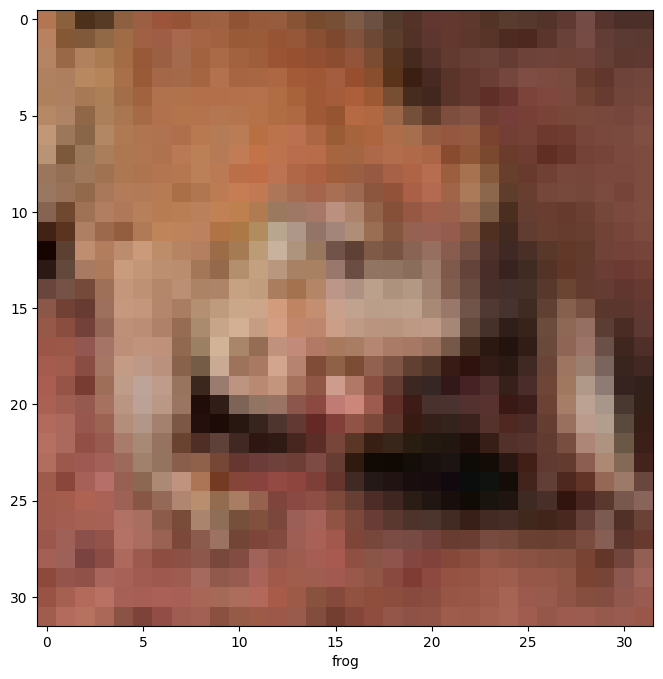

In [47]:
plot_sample(X_test,y_test,5)

In [48]:
classes[y_classes[5]]

'frog'

In [50]:
classes[y_classes[3]]

'airplane'

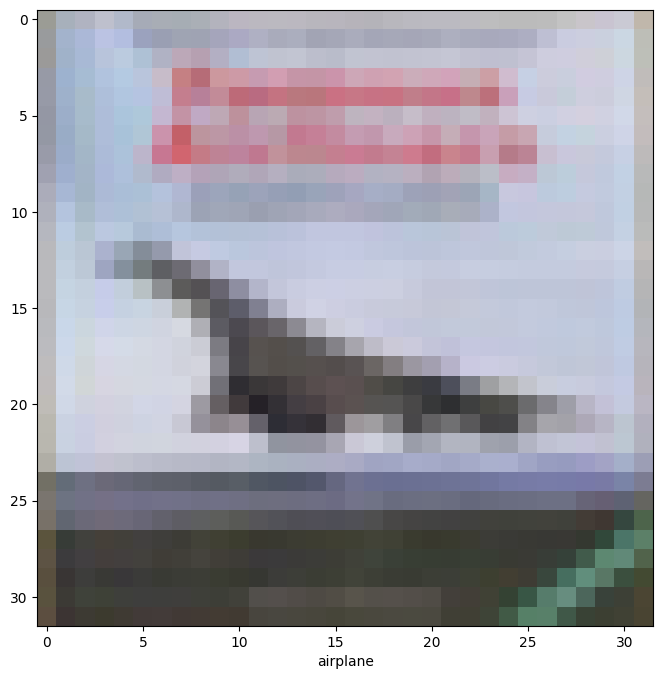

In [51]:
plot_sample(X_test,y_test,3)

In [52]:
print("Classification report : \n",classification_report(y_test,y_classes))

Classification report : 
               precision    recall  f1-score   support

           0       0.62      0.70      0.66      1000
           1       0.82      0.67      0.74      1000
           2       0.46      0.49      0.47      1000
           3       0.64      0.24      0.35      1000
           4       0.50      0.65      0.56      1000
           5       0.58      0.49      0.53      1000
           6       0.66      0.77      0.71      1000
           7       0.64      0.74      0.69      1000
           8       0.72      0.73      0.73      1000
           9       0.66      0.77      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.63      0.62     10000

